In [ ]:

import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score

In [ ]:
iris = load_iris()
X = iris.data
y = iris.target

print("Dataset shape:", X.shape)

Dataset shape: (150, 4)


In [ ]:
def k_fold_cv_knn(X, y, k=5, n_neighbors=3):
    kf = KFold(n_splits=k, shuffle=True, random_state=42)
    accuracies = []

    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        knn = KNeighborsClassifier(n_neighbors=n_neighbors)
        knn.fit(X_train, y_train)

        y_pred = knn.predict(X_test)
        acc = accuracy_score(y_test, y_pred)
        accuracies.append(acc)

    return np.mean(accuracies)



In [ ]:
avg_accuracy = k_fold_cv_knn(X, y, k=5, n_neighbors=3)
print(f"Average k-NN Accuracy using 5-Fold CV: {avg_accuracy:.3f}")

Average k-NN Accuracy using 5-Fold CV: 0.967


In [ ]:
def bootstrap_regression(X, y, n_bootstraps=500):
    n_samples = len(X)
    coefficients = []

    for _ in range(n_bootstraps):
        indices = np.random.choice(n_samples, n_samples, replace=True)
        X_boot = X[indices]
        y_boot = y[indices]

        model = LinearRegression()
        model.fit(X_boot, y_boot)
        coefficients.append(model.coef_)

    return np.array(coefficients)

In [ ]:
X_reg = X[:, :2]
y_reg = X[:, 2]

In [ ]:
coefs = bootstrap_regression(X_reg, y_reg, n_bootstraps=500)
print("Bootstrap completed. Shape:", coefs.shape)

Bootstrap completed. Shape: (500, 2)


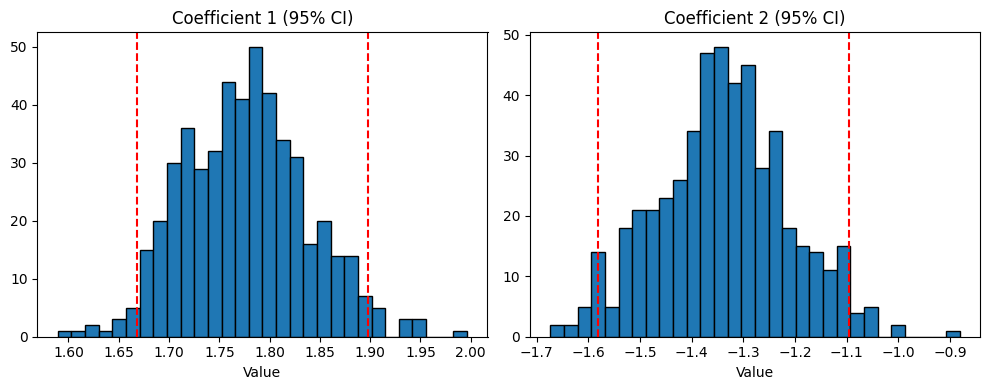

In [ ]:
plt.figure(figsize=(10, 4))

# Coefficient 1
plt.subplot(1, 2, 1)
plt.hist(coefs[:, 0], bins=30, edgecolor='black')
plt.axvline(np.percentile(coefs[:, 0], 2.5), color='red', linestyle='--')
plt.axvline(np.percentile(coefs[:, 0], 97.5), color='red', linestyle='--')
plt.title("Coefficient 1 (95% CI)")
plt.xlabel("Value")

# Coefficient 2
plt.subplot(1, 2, 2)
plt.hist(coefs[:, 1], bins=30, edgecolor='black')
plt.axvline(np.percentile(coefs[:, 1], 2.5), color='red', linestyle='--')
plt.axvline(np.percentile(coefs[:, 1], 97.5), color='red', linestyle='--')
plt.title("Coefficient 2 (95% CI)")
plt.xlabel("Value")

plt.tight_layout()
plt.show()

In [ ]:
print("\nBootstrap Results (95% Confidence Intervals):")

for i in range(coefs.shape[1]):
    lower = np.percentile(coefs[:, i], 2.5)
    upper = np.percentile(coefs[:, i], 97.5)
    print(f"Coefficient {i+1}: [{lower:.3f}, {upper:.3f}]")


Bootstrap Results (95% Confidence Intervals):
Coefficient 1: [1.668, 1.898]
Coefficient 2: [-1.581, -1.096]


In [11]:
kf = KFold(n_splits=4, shuffle=True, random_state=42)
print("Fold-wise k-NN Accuracy:")
for i, (train_idx, test_idx) in enumerate(kf.split(X), 1):
    knn = KNeighborsClassifier(n_neighbors=3)
    knn.fit(X[train_idx], y[train_idx])
    acc = accuracy_score(y[test_idx], knn.predict(X[test_idx]))
    print(f"Fold {i}: {acc:.4f}")

Fold-wise k-NN Accuracy:
Fold 1: 1.0000
Fold 2: 0.9737
Fold 3: 0.9189
Fold 4: 0.9730
